# Identifying gene difference content in closely related strains

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import statistics

In [2]:
df_cr = pd.read_csv(r"C:\Users\jojoa\GitHub\staph\data\df_cr_final.csv")

In [3]:
df_cr=df_cr.set_index('Unnamed: 0')

In [4]:
df_cr

,18942,1053,36653,35906,24887,40959,19451,16248,17887,44480,...,29295,20565,22234,31939,40447,22779,40560,37248,6454,38985
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
18942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36653,0.000044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000211,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_pa=pd.read_csv(r"C:\Users\jojoa\GitHub\staph\data\binary_matrix.csv")

In [6]:
df_pa=df_pa.set_index('Unnamed: 0')

For an exmaple, let's look at the difference in genes between strains 18942 and 36653.

In [7]:
df_pa['36653']

Unnamed: 0
0        1
1        1
2        1
3        1
4        1
        ..
29715    0
29716    0
29717    0
29718    0
29719    0
Name: 36653, Length: 29720, dtype: int64

In [8]:
df_pa['18942']

Unnamed: 0
0        1
1        1
2        1
3        1
4        1
        ..
29715    0
29716    0
29717    0
29718    0
29719    0
Name: 18942, Length: 29720, dtype: int64

In [9]:
diff=df_pa['36653']-df_pa['18942']
diff

Unnamed: 0
0        0
1        0
2        0
3        0
4        0
        ..
29715    0
29716    0
29717    0
29718    0
29719    0
Length: 29720, dtype: int64

In [10]:
gene_diff=diff.to_numpy().nonzero() 

These numbers represent the indecies at which our two strains differ. These indecies directly correlate to genes. Thus, we can see which genes the two strains differ by.

In [11]:
gene_diff=gene_diff[0]

In [12]:
len(gene_diff), gene_diff

(98,
 array([1886, 1939, 1969, 2080, 2083, 2093, 2120, 2161, 2165, 2177, 2216,
        2221, 2270, 2355, 2380, 2408, 2439, 2452, 2455, 2472, 2561, 2611,
        2613, 2643, 2677, 2695, 2696, 2728, 2743, 2772, 2785, 2833, 2894,
        2942, 2970, 2978, 2989, 2990, 3003, 3011, 3015, 3024, 3028, 3097,
        3119, 3120, 3122, 3136, 3149, 3151, 3154, 3157, 3158, 3193, 3203,
        3216, 3231, 3247, 3287, 3303, 3307, 3366, 3372, 3374, 3381, 3404,
        3408, 3414, 3432, 3447, 3451, 3453, 3464, 3472, 3527, 3547, 3603,
        3614, 3627, 3663, 3672, 3696, 3723, 3776, 3790, 3798, 3801, 3880,
        3899, 4177, 4509, 4525, 4898, 5004, 5320, 5384, 5416, 6318],
       dtype=int64))

From this, we can see that the two strains differ by 98 genes. We can continue this cycle for all the 100 strains.

In [13]:
if isinstance(df_cr.iloc[0,0],float)==True:
            diff=df_pa[str(df_cr.columns[0])]-df_pa[str(df_cr.index[0])]
            gene_diff=diff.to_numpy().nonzero()
            gene_diff=gene_diff[0]
            print(len(gene_diff))

0


In [14]:
gene_list=[] #list of all closely related strains with the genes that differ
gene_diff_list=[] #list of all closely related strains with number of genes that differ

In [15]:
for i in range(0,len(df_cr.columns)): #columns + len(df_cr.columns)
    for j in range(0,len(df_cr)): #rows+len(df_cr)
        if pd.isna(df_cr.iloc[j,i])==False: #if cell is not empty, then calculate gene diff between strains
            diff=df_pa[str(df_cr.columns[i])]-df_pa[str(df_cr.index[j])]
            gene_diff=diff.to_numpy().nonzero()
            gene_diff=gene_diff[0]
            gene_list.append({"Gene Difference":gene_diff, "Gene Difference Length":len(gene_diff),
                              "Strain 1":str(df_cr.columns[i]),"Strain 2":str(df_cr.index[j])})

In [16]:
diff=df_pa[str(df_cr.columns[0])]-df_pa[str(df_cr.index[1])]
gene_diff=diff.to_numpy().nonzero()
gene_diff=gene_diff[0]
gene_diff

array([  43,  265,  344, ..., 3921, 4177, 4898], dtype=int64)

In [17]:
gene_list=pd.DataFrame(gene_list) #dataframe with two strains that are closely related, the length of gene difference, and
# which genes differ

We have 756 pairs of strains that are closely related.

In [18]:
gene_diff_len=gene_list['Gene Difference Length']

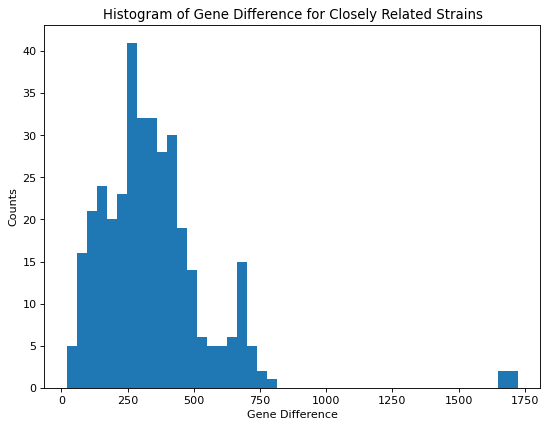

In [19]:
figure(figsize=(8, 6), dpi=80)
hist=plt.hist(gene_diff_len,bins=45)
plt.xlabel('Gene Difference')
plt.ylabel('Counts')
plt.title('Histogram of Gene Difference for Closely Related Strains')
#plt.savefig(r"C:\Users\jojoa\GitHub\staph\images\gene_hist")
#plt.axvline(316.5) mean
plt.savefig(r"C:\Users\jojoa\GitHub\staph\images\gene_hist.eps",format='eps')

In [20]:
np.mean(gene_diff_len)

347.3276836158192

In [21]:
df_dist = pd.read_csv(r"C:\Users\jojoa\GitHub\staph\data\dist_matrix.csv")
df_dist = df_dist.set_index('Unnamed: 0')
df_dist=df_dist.rename(columns={"Unnamed: 0": "Strains"})

In [22]:
dist_list=[]

In [23]:
for i in range(0,len(gene_list.index)):
    strain1=gene_list['Strain 1'].iloc[i]
    strain2=gene_list['Strain 2'].iloc[i]
    strain2=int(strain2)
    a=df_dist[strain1] #distances for all strains related to strain 1
    dist=a.loc[strain2] #dist btw strain 1 and strain 2
    dist_list.append({"Strain 1":strain1,"Strain 2":strain2, "Core Distance":dist})

In [24]:
dist_list=pd.DataFrame(dist_list) #dataframe with two strains that are closely related and dist between them

In [25]:
dist_list

,Strain 1,Strain 2,Core Distance
0,18942,36653,0.000044
1,18942,31541,0.000057
2,18942,36962,0.000063
3,18942,15699,0.000044
4,18942,24898,0.000050
...,...,...,...
349,42995,37248,0.000199
350,449,4302,0.000135
351,449,20565,0.000154
352,2874,2448,0.000287


In [26]:
gene_list

,Gene Difference,Gene Difference Length,Strain 1,Strain 2
0,"[1886, 1939, 1969, 2080, 2083, 2093, 2120, 216...",98,18942,36653
1,"[1886, 1939, 2027, 2042, 2083, 2093, 2120, 216...",106,18942,31541
2,"[1939, 2080, 2083, 2093, 2120, 2165, 2177, 222...",109,18942,36962
3,"[1939, 1994, 2027, 2083, 2093, 2120, 2123, 216...",157,18942,15699
4,"[1939, 2080, 2083, 2093, 2120, 2154, 2162, 216...",154,18942,24898
...,...,...,...,...
349,"[1988, 2039, 2042, 2055, 2075, 2076, 2077, 209...",410,42995,37248
350,"[2055, 2075, 2080, 2100, 2106, 2132, 2141, 214...",248,449,4302
351,"[1988, 2037, 2055, 2075, 2085, 2100, 2101, 210...",348,449,20565
352,"[1902, 1989, 2034, 2080, 2083, 2245, 2249, 225...",347,2874,2448


In [27]:
df_col_merged = pd.concat([dist_list, gene_list], axis=1) #merged both dataframe

In [28]:
df_col_merged

,Strain 1,Strain 2,Core Distance,Gene Difference,Gene Difference Length,Strain 1,Strain 2
0,18942,36653,0.000044,"[1886, 1939, 1969, 2080, 2083, 2093, 2120, 216...",98,18942,36653
1,18942,31541,0.000057,"[1886, 1939, 2027, 2042, 2083, 2093, 2120, 216...",106,18942,31541
2,18942,36962,0.000063,"[1939, 2080, 2083, 2093, 2120, 2165, 2177, 222...",109,18942,36962
3,18942,15699,0.000044,"[1939, 1994, 2027, 2083, 2093, 2120, 2123, 216...",157,18942,15699
4,18942,24898,0.000050,"[1939, 2080, 2083, 2093, 2120, 2154, 2162, 216...",154,18942,24898
...,...,...,...,...,...,...,...
349,42995,37248,0.000199,"[1988, 2039, 2042, 2055, 2075, 2076, 2077, 209...",410,42995,37248
350,449,4302,0.000135,"[2055, 2075, 2080, 2100, 2106, 2132, 2141, 214...",248,449,4302
351,449,20565,0.000154,"[1988, 2037, 2055, 2075, 2085, 2100, 2101, 210...",348,449,20565
352,2874,2448,0.000287,"[1902, 1989, 2034, 2080, 2083, 2245, 2249, 225...",347,2874,2448


In [29]:
df_col_merged = df_col_merged.loc[:,~df_col_merged.columns.duplicated()].copy() #removed duplicate columns

In [30]:
df_col_merged

,Strain 1,Strain 2,Core Distance,Gene Difference,Gene Difference Length
0,18942,36653,0.000044,"[1886, 1939, 1969, 2080, 2083, 2093, 2120, 216...",98
1,18942,31541,0.000057,"[1886, 1939, 2027, 2042, 2083, 2093, 2120, 216...",106
2,18942,36962,0.000063,"[1939, 2080, 2083, 2093, 2120, 2165, 2177, 222...",109
3,18942,15699,0.000044,"[1939, 1994, 2027, 2083, 2093, 2120, 2123, 216...",157
4,18942,24898,0.000050,"[1939, 2080, 2083, 2093, 2120, 2154, 2162, 216...",154
...,...,...,...,...,...
349,42995,37248,0.000199,"[1988, 2039, 2042, 2055, 2075, 2076, 2077, 209...",410
350,449,4302,0.000135,"[2055, 2075, 2080, 2100, 2106, 2132, 2141, 214...",248
351,449,20565,0.000154,"[1988, 2037, 2055, 2075, 2085, 2100, 2101, 210...",348
352,2874,2448,0.000287,"[1902, 1989, 2034, 2080, 2083, 2245, 2249, 225...",347


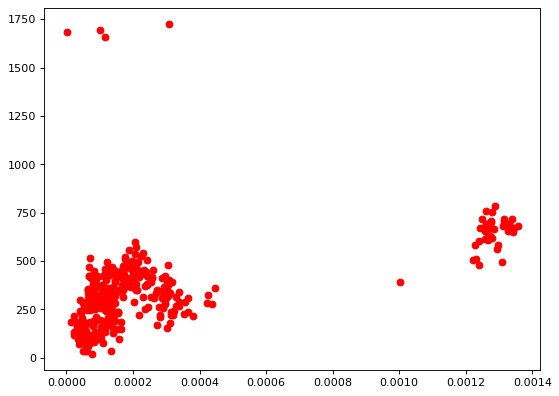

In [31]:
figure(figsize=(8, 6), dpi=80)
plt.scatter(df_col_merged['Core Distance'],df_col_merged['Gene Difference Length'], color='r')

y=310547.611492x+(260.236381)


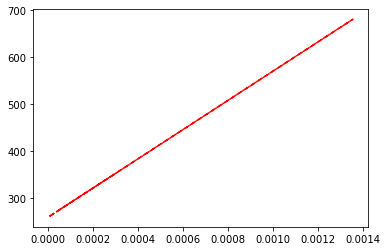

In [32]:
# calculating the trend line
z = np.polyfit(df_col_merged['Core Distance'],df_col_merged['Gene Difference Length'], 1)
p = np.poly1d(z)
plt.plot(df_col_merged['Core Distance'],p(df_col_merged['Core Distance']),"r--")
# the line equation:
print("y=%.6fx+(%.6f)"%(z[0],z[1]))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


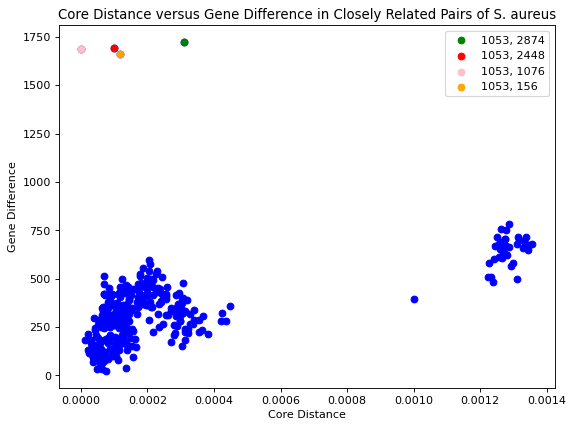

In [33]:
figure(figsize=(8, 6), dpi=80)
plt.scatter(df_col_merged['Core Distance'],df_col_merged['Gene Difference Length'], color='b')
plt.scatter(df_col_merged['Core Distance'][8],df_col_merged['Gene Difference Length'][8], color='g',label='1053, 2874')
plt.scatter(df_col_merged['Core Distance'][9],df_col_merged['Gene Difference Length'][9], color='red',label='1053, 2448')
plt.scatter(df_col_merged['Core Distance'][10],df_col_merged['Gene Difference Length'][10], color='pink',label='1053, 1076')
plt.scatter(df_col_merged['Core Distance'][7],df_col_merged['Gene Difference Length'][7], color='orange',label='1053, 156')
#plt.plot(df_col_merged['Core Distance'],p(df_col_merged['Core Distance']),"r--")
plt.title('Core Distance versus Gene Difference in Closely Related Pairs of S. aureus')
plt.xlabel('Core Distance')
plt.ylabel('Gene Difference')
plt.legend()
#plt.savefig(r"C:\Users\jojoa\GitHub\staph\images\dist_vs_dist")
plt.savefig(r"C:\Users\jojoa\GitHub\staph\images\dist_vs_dist.eps",format='eps')

In [34]:
statistics.stdev(df_col_merged['Gene Difference Length'])

218.61835003224942

Let's see which gene was included the most in the gene difference.

In [35]:
all_genes=[]
for i in range(0,len(df_col_merged['Gene Difference'])):
    all_genes.append(df_col_merged['Gene Difference'][i]) #make the series of arrays into just one array

In [36]:
genes_list=np.concatenate(all_genes).ravel().tolist() #make all the arrays just flatten into one list

In [37]:
from collections import Counter

In [38]:
count=Counter(genes_list) #count all instances of genes in closely related strains
count=count.most_common() #sort by max occurrences to min
#gene ID with number of occurences

Now we have a detailed list of all the genes in the closely related strains ranked by how often they show up in the pairs.

In [39]:
df_gene=pd.read_csv(r"C:\Users\jojoa\GitHub\staph\data\presence_absence.csv") #dataframe with gene names

C:\Users\jojoa\.conda\envs\disperse_env\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [40]:
df_gene['Gene'][2333] #gene with most occurences

'group_1428'

This means that gene number 2333 is the highest occuring gene, with the actual gene being group_1428.

In [104]:
count

[(2333, 167),
 (2346, 166),
 (2336, 163),
 (2544, 163),
 (2363, 162),
 (2414, 162),
 (2330, 160),
 (2410, 160),
 (2374, 160),
 (2340, 158),
 (2384, 157),
 (2439, 156),
 (2371, 156),
 (2353, 156),
 (2825, 156),
 (2417, 155),
 (2794, 155),
 (2309, 154),
 (2311, 154),
 (2312, 154),
 (2315, 154),
 (2321, 154),
 (2324, 154),
 (2263, 153),
 (2634, 153),
 (2310, 152),
 (2317, 152),
 (2319, 152),
 (2334, 152),
 (2521, 152),
 (2356, 151),
 (2341, 150),
 (2313, 150),
 (2435, 148),
 (2921, 147),
 (2446, 147),
 (2594, 145),
 (2459, 144),
 (2328, 144),
 (2466, 144),
 (2568, 144),
 (2723, 142),
 (3200, 141),
 (2462, 141),
 (2655, 139),
 (2288, 139),
 (3144, 138),
 (2901, 138),
 (2644, 137),
 (2646, 137),
 (2667, 137),
 (2668, 137),
 (2670, 137),
 (2415, 136),
 (2893, 134),
 (2659, 134),
 (2713, 134),
 (3140, 133),
 (2682, 132),
 (2551, 132),
 (2553, 132),
 (2834, 131),
 (2660, 131),
 (2421, 130),
 (2380, 129),
 (2877, 129),
 (2936, 129),
 (2985, 129),
 (3158, 128),
 (2571, 128),
 (3262, 128),
 (3270

In [43]:
x_val = [x[0] for x in count] #gene IDs
y_val = [x[1] for x in count] #number of time genes occur

We want the number of times the genes occur and the number of genes that have that occurence count.

In [86]:
num_list=[]
for i in range(0,len(count)):
    j=count[i][1]
    num=y_val.count(j)
    num_list.append(num) #number of genes that have occurence count corresponding to number of timess the gene occurs

In [103]:
#figure(figsize=(8, 6), dpi=80)
#plt.bar(y_val,num_list,color='green',width=10)
#plt.ylabel('Number of Genes')
#plt.xlabel('Number of Occurrences')
#plt.title('Frequency of Genes in Closely Related Strains')
#plt.savefig(r"C:\Users\jojoa\GitHub\staph\images\freq_bar")
#plt.savefig(r"C:\Users\jojoa\GitHub\staph\images\site_freq.eps",format='eps')

Text(0.5, 1.0, 'Frequency of Genes in Closely Related Strains')

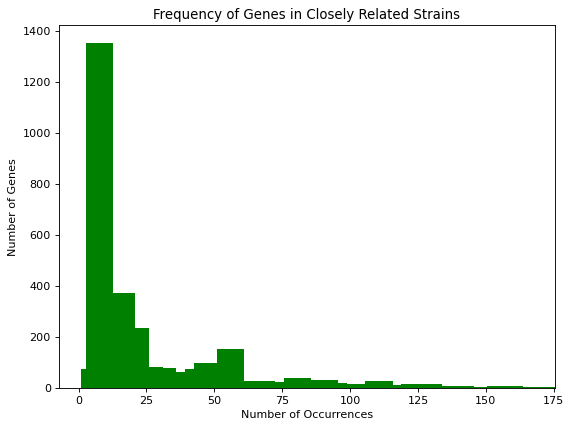

In [102]:
#histogram
figure(figsize=(8, 6), dpi=80)
plt.hist(y_val,color='green',width=10,bins=100)
plt.ylabel('Number of Genes')
plt.xlabel('Number of Occurrences')
plt.title('Frequency of Genes in Closely Related Strains')
plt.savefig(r"C:\Users\jojoa\GitHub\staph\images\site_freq.eps",format='eps')

In [45]:
freq = {'Gene Index Number': x_val, 'Frequency': y_val}
df_freq = pd.DataFrame(data=freq)

In [46]:
df_freq

,Gene Index Number,Frequency
0,2333,167
1,2346,166
2,2336,163
3,2544,163
4,2363,162
...,...,...
4146,6369,1
4147,6385,1
4148,7190,1
4149,11447,1


In [105]:
df_gene['Gene'][2333] #gene with most occurences

'group_1428'

In [48]:
df_freq.to_csv(r"C:\Users\jojoa\GitHub\staph\data\gene_frequency.csv",index=False)

Now we can arrange the gene difference lengths in descending order to see which has the highest gene difference.

In [49]:
df_col_merged['Gene Difference Length'].sort_values(ascending=False)

8      1724
9      1693
10     1686
7      1659
314     783
       ... 
75       36
170      36
174      35
124      33
120      21
Name: Gene Difference Length, Length: 354, dtype: int64

In [50]:
df_col_merged['Gene Difference']

0      [1886, 1939, 1969, 2080, 2083, 2093, 2120, 216...
1      [1886, 1939, 2027, 2042, 2083, 2093, 2120, 216...
2      [1939, 2080, 2083, 2093, 2120, 2165, 2177, 222...
3      [1939, 1994, 2027, 2083, 2093, 2120, 2123, 216...
4      [1939, 2080, 2083, 2093, 2120, 2154, 2162, 216...
                             ...                        
349    [1988, 2039, 2042, 2055, 2075, 2076, 2077, 209...
350    [2055, 2075, 2080, 2100, 2106, 2132, 2141, 214...
351    [1988, 2037, 2055, 2075, 2085, 2100, 2101, 210...
352    [1902, 1989, 2034, 2080, 2083, 2245, 2249, 225...
353    [1578, 1587, 1628, 1636, 1645, 1655, 1656, 166...
Name: Gene Difference, Length: 354, dtype: object

In [51]:
df_col_merged[df_col_merged['Strain 1'].str.contains('1053')]

,Strain 1,Strain 2,Core Distance,Gene Difference,Gene Difference Length
7,1053,156,0.000117,"[43, 265, 344, 368, 399, 409, 451, 486, 493, 5...",1659
8,1053,2874,0.000309,"[43, 265, 344, 368, 399, 409, 451, 486, 493, 5...",1724
9,1053,2448,0.000101,"[43, 265, 344, 368, 399, 409, 451, 486, 493, 5...",1693
10,1053,1076,0.000001,"[43, 265, 344, 368, 399, 409, 451, 486, 493, 5...",1686


In [52]:
df_gene['1053'][399]

'BBDOGHJD_00966'